In [1]:
#!pip install termcolor

In [2]:
# 필요한 라이브러리를 불러온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

# 데이터 불러오기

In [3]:
df = pd.read_csv(r'C:\Users\1104-28\Clean_Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.shape

(300153, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [7]:
# 결측치의 합
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
# 불필요한 칼럼 제거
df.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
# class를 fight_class로 재정의
df.rename(columns={'class': 'flight_class'}, inplace=True)

In [10]:
print(df)

         airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city flight_class  duration  days_left  price  
0       

## 각 칼럼별 index를 지정해서 시각화하기

In [11]:
# 각 칼럼별 순서 정하기
for index, value in enumerate(df.columns):
    print(index, ":", value)

0 : airline
1 : flight
2 : source_city
3 : departure_time
4 : stops
5 : arrival_time
6 : destination_city
7 : flight_class
8 : duration
9 : days_left
10 : price


In [12]:
# airline 도수 분포표 정의
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

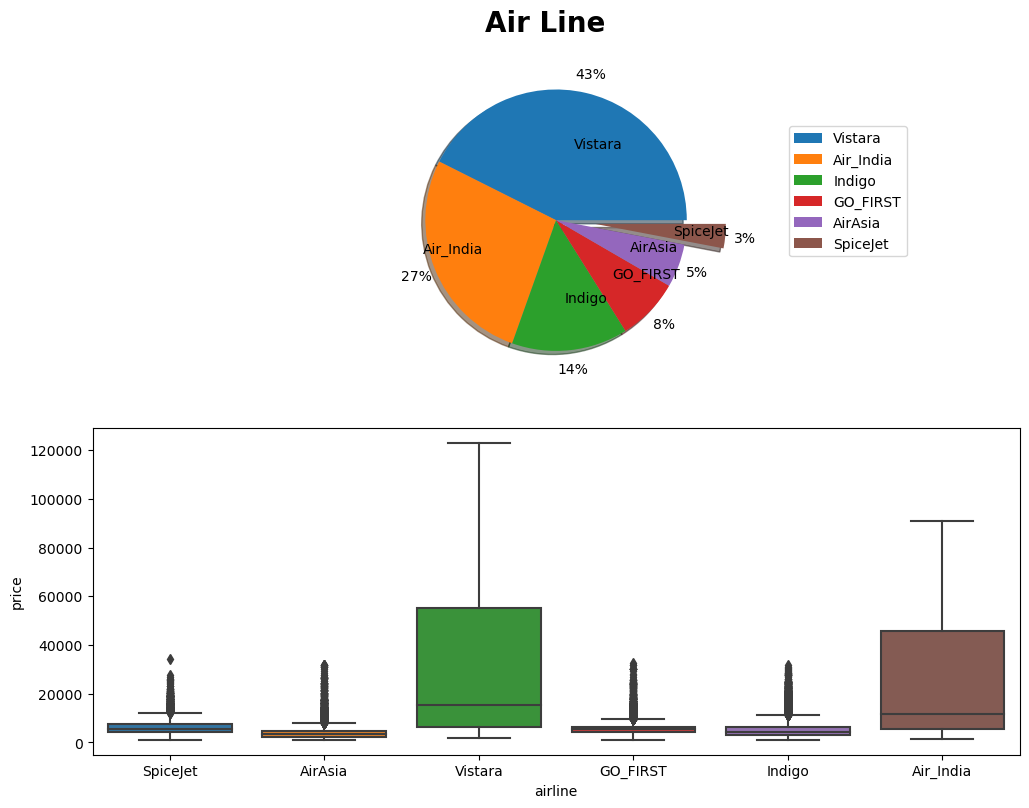

In [13]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle('Air Line', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['airline'].value_counts().index.tolist()
explode = (0,0,0,0,0,0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='airline', y='price', data=df, ax=ax[1])

plt.show()

In [14]:
# flight의 도수분포표의 정의
len(df.flight.value_counts())

1561

In [15]:
# flight 컬럼 제거
df.drop(columns=['flight'], inplace=True)

In [16]:
# source_city 도수분포표
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

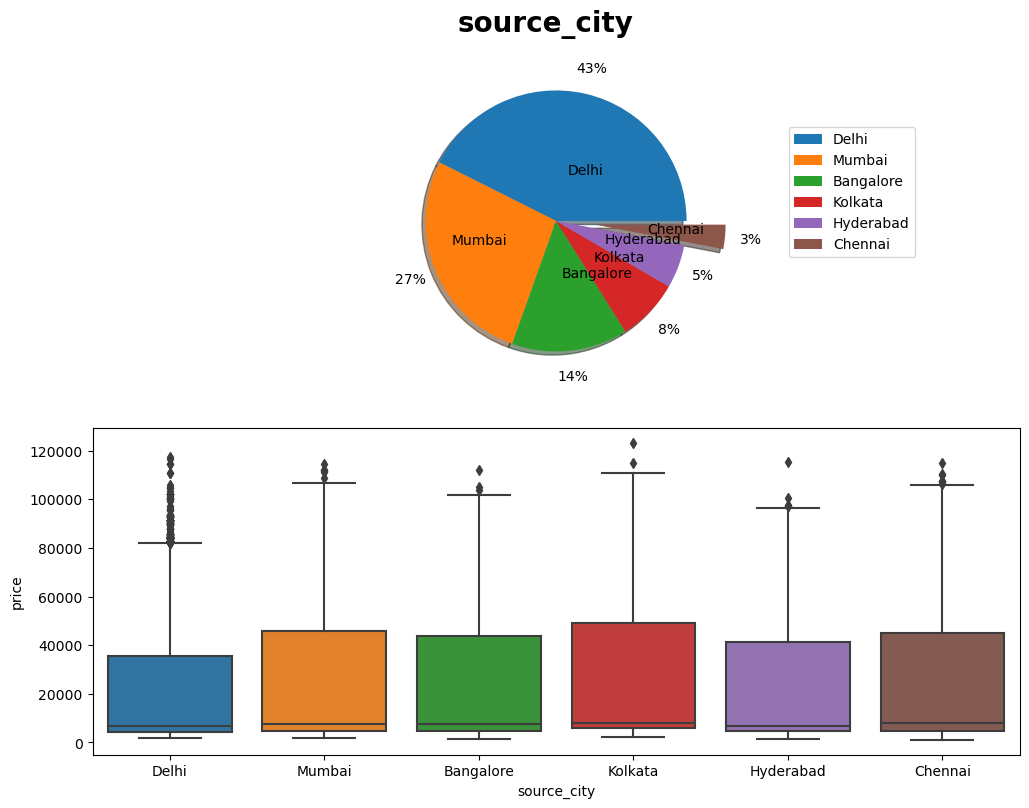

In [17]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle('source_city', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['source_city'].value_counts().index.tolist()
explode = (0,0,0,0,0,0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='source_city', y='price', data=df, ax=ax[1])

plt.show()

In [18]:
# departure_time 도수분포표 정의
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

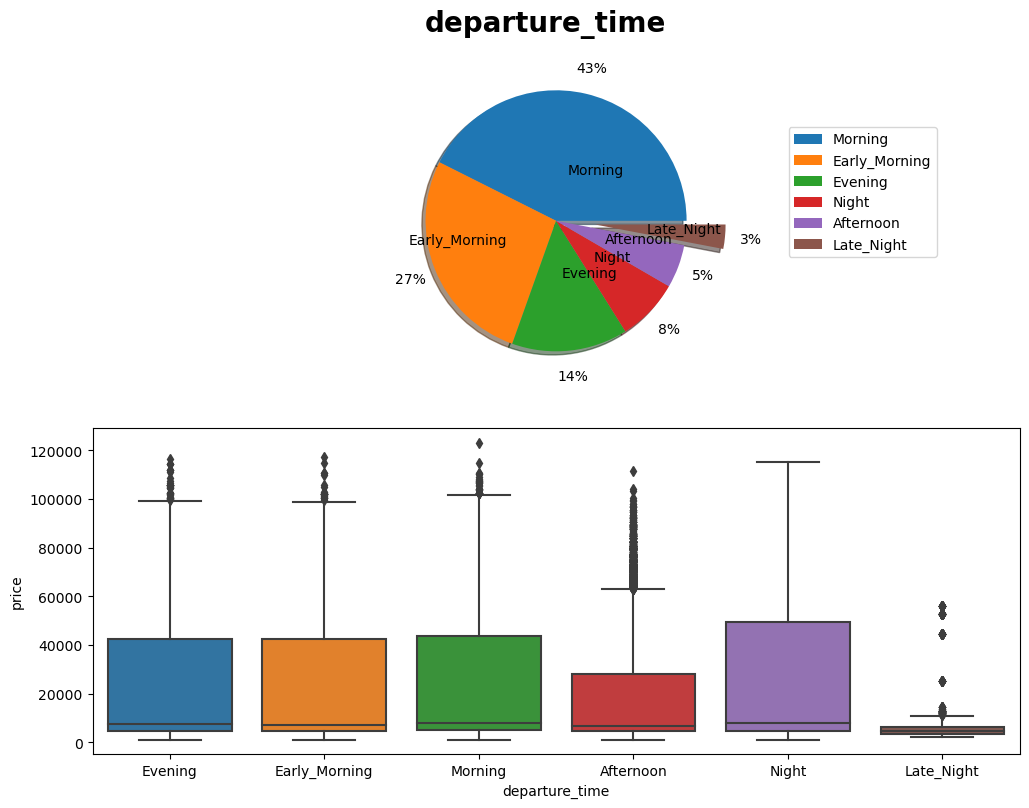

In [19]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10,8))
fig.suptitle('departure_time', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['departure_time'].value_counts().index.tolist()
explode = (0,0,0,0,0,0.3)
ax[0].pie(df.airline.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='departure_time', y='price', data=df, ax=ax[1])

plt.show()

In [20]:
# stops 도수 분포표
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

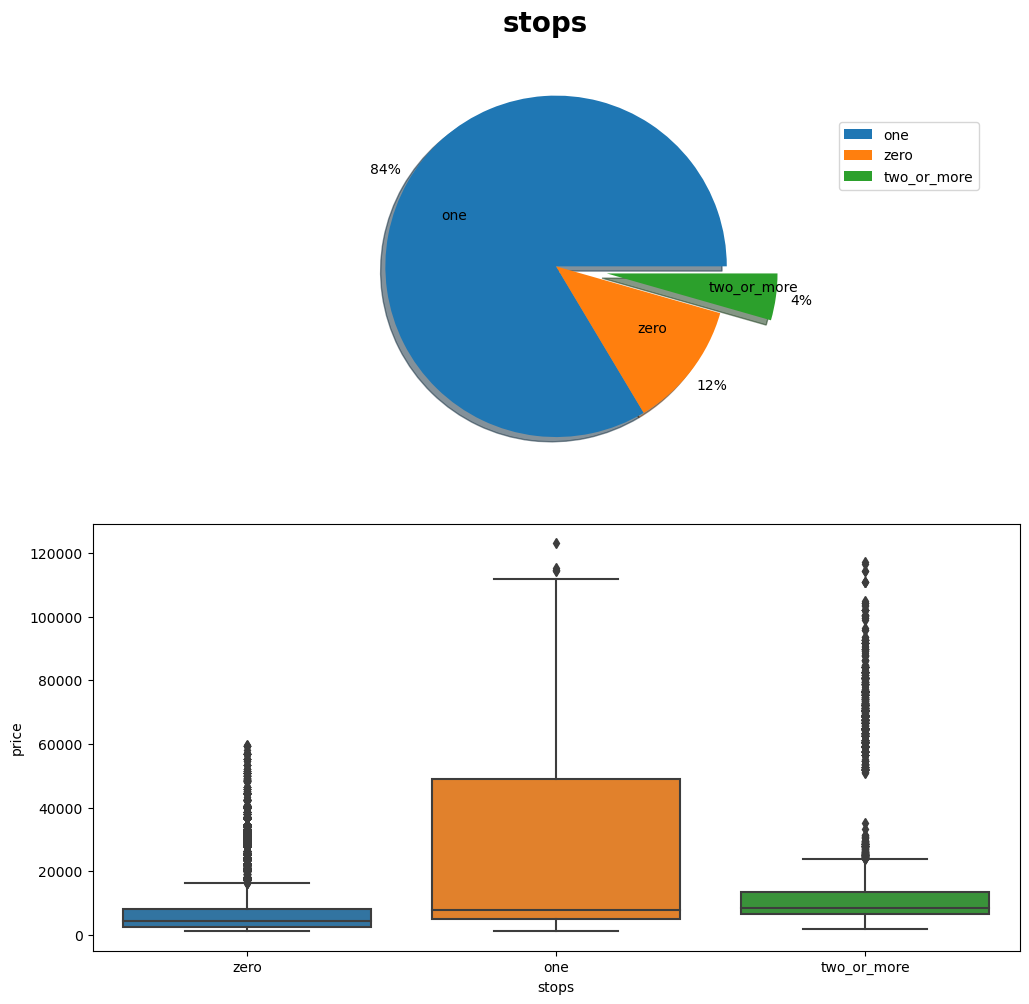

In [21]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('stops', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['stops'].value_counts().index.tolist()
explode = (0,0,0.3)
ax[0].pie(df.stops.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.15, labeldistance=0.6, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='stops', y='price', data=df, ax=ax[1])

plt.show()

In [22]:
# arrival_time 도수분포표
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

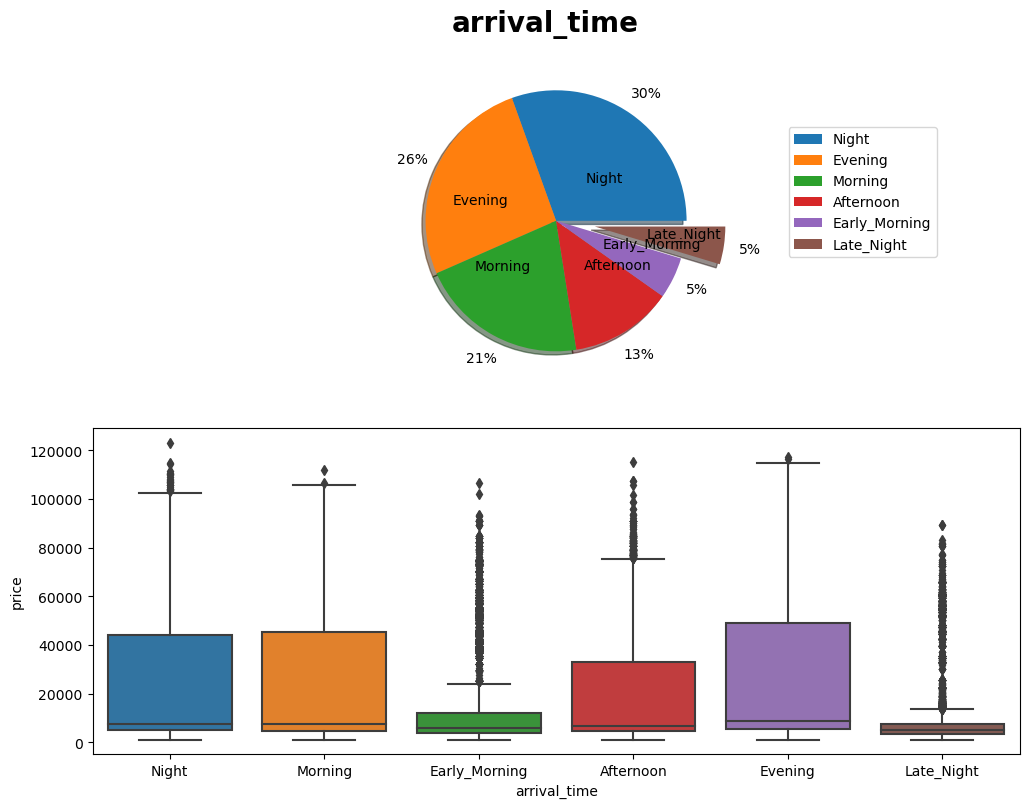

In [23]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('arrival_time', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['arrival_time'].value_counts().index.tolist()
explode = (0,0,0,0,0,0.3)
ax[0].pie(df.arrival_time.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='arrival_time', y='price', data=df, ax=ax[1])

plt.show()

In [24]:
# destination_city 도수분포표
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

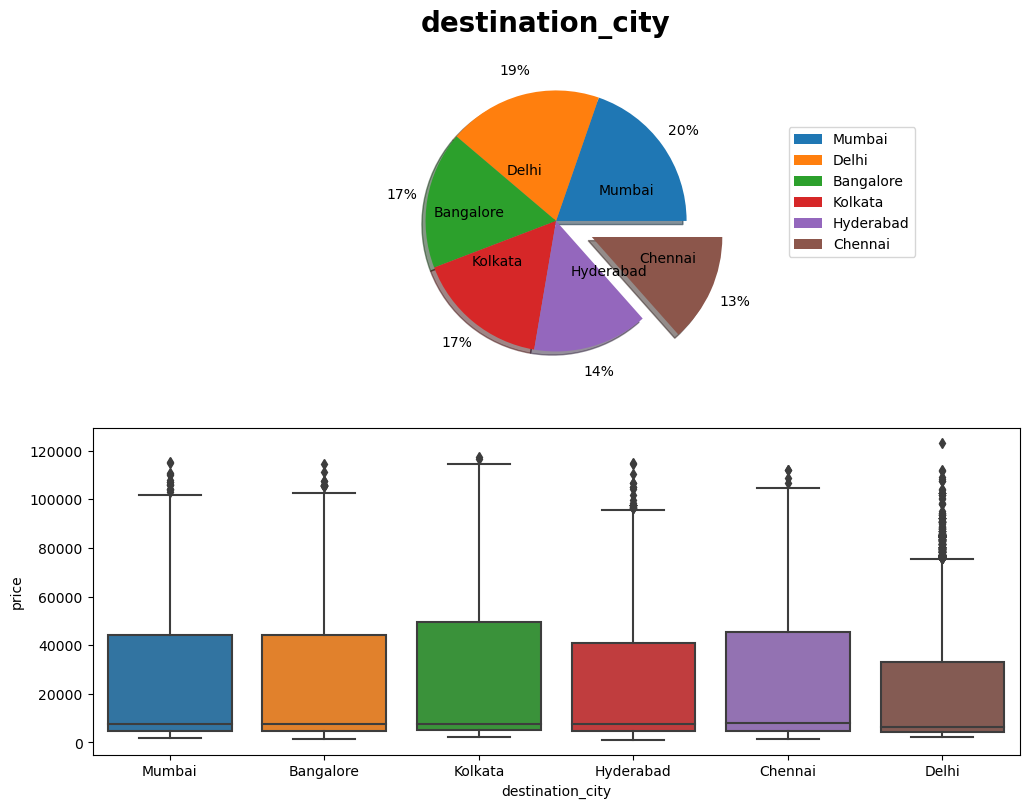

In [25]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('destination_city', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['destination_city'].value_counts().index.tolist()
explode = (0,0,0,0,0,0.3)
ax[0].pie(df.destination_city.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4, explode=explode)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='destination_city', y='price', data=df, ax=ax[1])

plt.show()

In [26]:
# flight_class 도수분포표의 정의
df['flight_class'].value_counts()

flight_class
Economy     206666
Business     93487
Name: count, dtype: int64

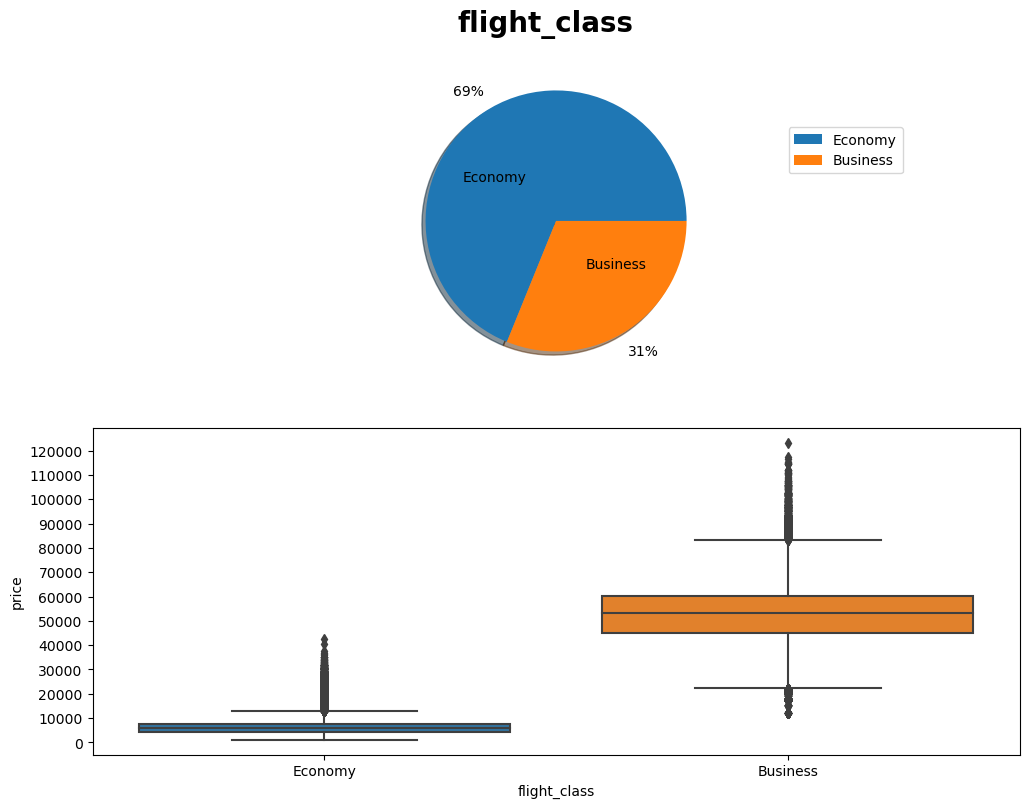

In [27]:
# 시각화
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
fig.suptitle('flight_class', fontsize=20, fontweight='bold')
plt.tight_layout()

# Top ax
labels = df['flight_class'].value_counts().index.tolist()
#explode = (0,0,0,0,0,0.3)
ax[0].pie(df.flight_class.value_counts(), autopct='%.f%%', labels=labels, shadow=True, pctdistance=1.2, labeldistance=0.4)
ax[0].legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=5)

# Bottom ax
sns.boxplot(x='flight_class', y='price', data=df, ax=ax[1]).set_yticks(np.arange(0,130000,10000))

plt.show()

In [28]:
# duration의 도수분포표 정의
len(df.duration.value_counts())

476

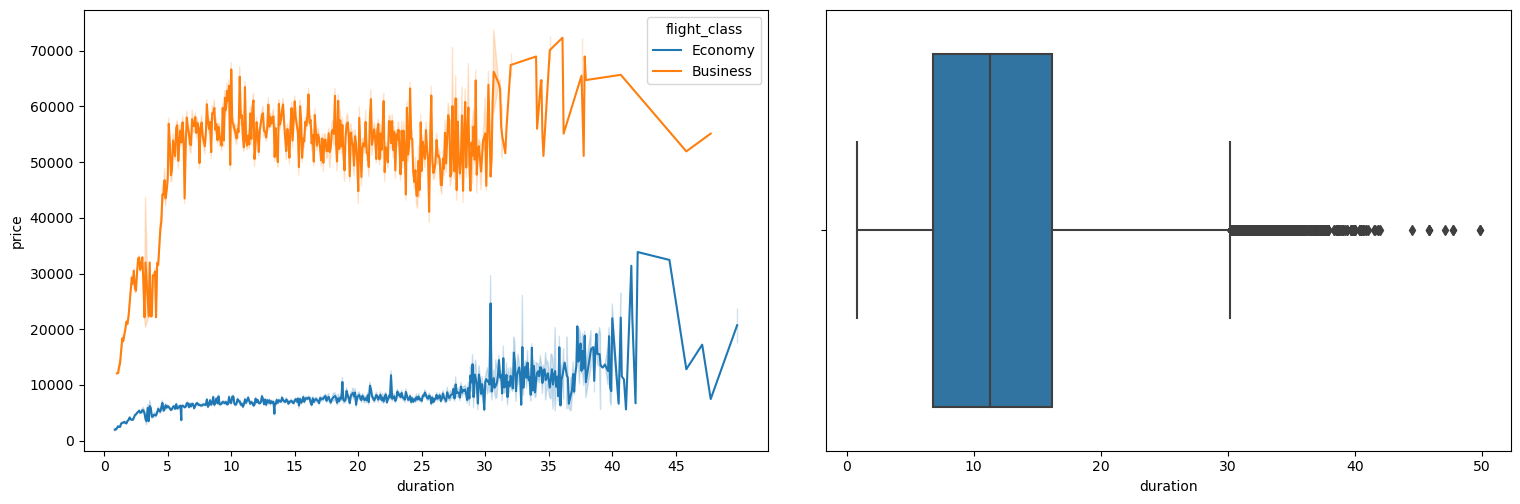

In [29]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='duration', y='price', data=df, ax=ax[0], hue='flight_class').set_xticks(np.arange(0,50,5))
# right ax
sns.boxplot(data=df, x='duration', ax=ax[1])

plt.show()

In [68]:
# days_left의 도수분포표 정의
len(df.days_left.value_counts())

49

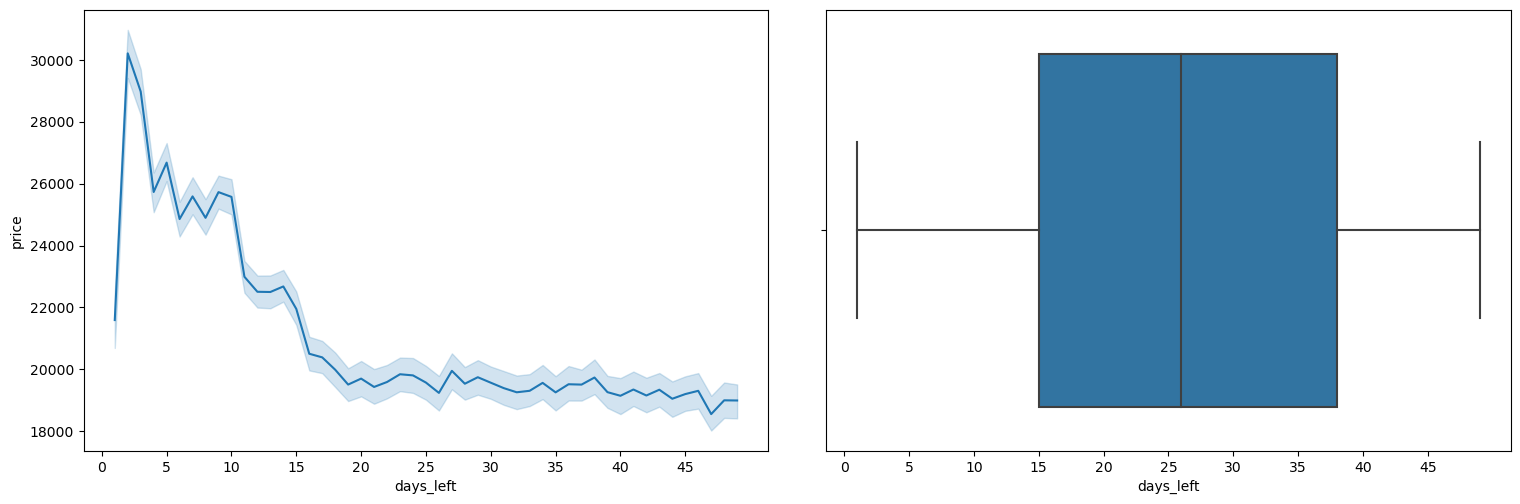

In [31]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()

# left ax
sns.lineplot(x='days_left', y='price', data=df, ax=ax[0]).set_xticks(np.arange(0,50,5))
# right ax
sns.boxplot(data=df, x='days_left', ax=ax[1]).set_xticks(np.arange(0,50,5))

plt.show()

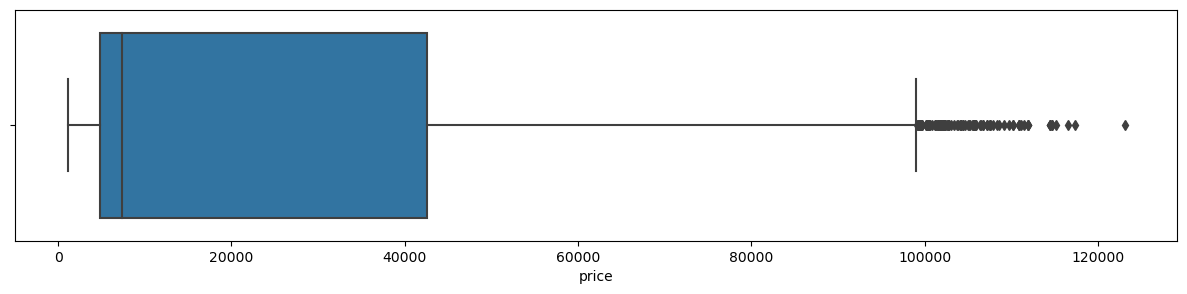

In [32]:
# price 시각화
plt.figure(figsize=(15,3))
sns.boxplot(data=df, x='price')
plt.show()

# 전처리

In [33]:
# col : airline
df.airline = df.airline.replace(
{
    'Vistara' : 1,
    'Air_India' : 2,
    'Indigo' : 3,
    'GO_FIRST' : 4,
    'AirAsia' : 5,
    'SpiceJet' : 6
}
)

# col : source_city
df.source_city = df.source_city.replace(
{
    'Delhi' : 1,
    'Mumbai' : 2,
    'Bangalore' : 3,
    'Kolkata' : 4,
    'Hyderabad' : 5,
    'Chennai' : 6
}
)


# col : departure_time
df.departure_time = df.departure_time.replace(
{
    'Morning' : 1,
    'Early_Morning' : 2,
    'Evening' : 3,
    'Night' : 4,
    'Afternoon' : 5,
    'Late_Night' : 6
}
)



# col : stops
df.stops = df.stops.replace(
{
    'one' : 1,
    'zero' : 2,
    'two_or_more' : 3
    
}
)



# col : arrival_time
df.arrival_time = df.arrival_time.replace(
{
    'Night' : 1,
    'Evening' : 2,
    'Morning' : 3,
    'Afternoon' : 4,
    'Early_Morning' : 5,
    'Late_Night' : 6
}
)


# col : destination_city
df.destination_city = df.destination_city.replace(
{
    'Mumbai' : 1,
    'Delhi' : 2,
    'Bangalore' : 3,
    'Kolkata' : 4,
    'Hyderabad' : 5,
    'Chennai' : 6
}
)


# col : flight_class
df.flight_class = df.flight_class.replace(
{
    'Economy' : 1,
    'Business' : 2
}    
)

In [34]:
#  전처리를 통해 정리한 기술적 통계
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,2.153072,3.201487,2.794901,1.208480,2.498846,3.268316,1.311464,12.221021,26.004751,20889.660523
std,1.348357,1.684757,1.401659,0.503533,1.407841,1.688644,0.463093,7.191997,13.561004,22697.767366
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.830000,1.000000,1105.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,6.830000,15.000000,4783.000000
50%,2.000000,3.000000,3.000000,1.000000,2.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,3.000000,5.000000,4.000000,1.000000,3.000000,5.000000,2.000000,16.170000,38.000000,42521.000000
max,6.000000,6.000000,6.000000,3.000000,6.000000,6.000000,2.000000,49.830000,49.000000,123071.000000


# 상관계수

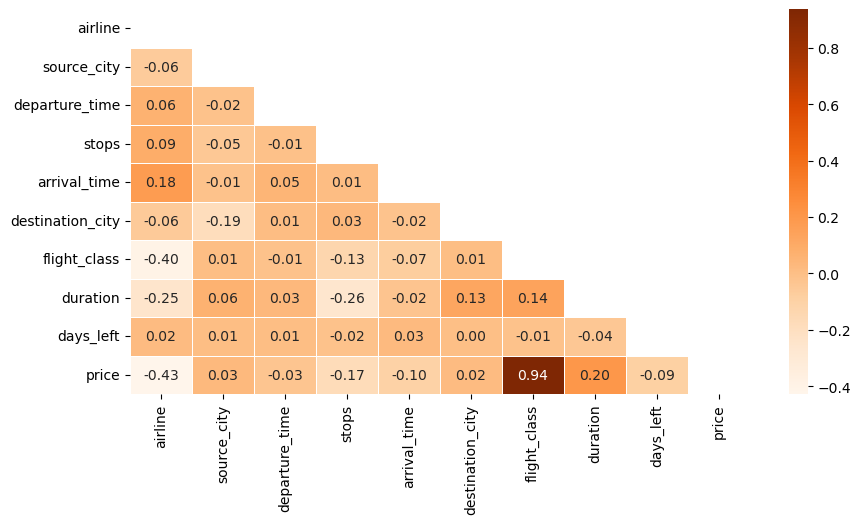

In [35]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, linecolor='white', mask=np.triu(corr), cmap='Oranges')
plt.show()

# X,Y를 정의

In [36]:
# price 칼럼 제거
X_temp = df.drop(columns=['price'])
Y = df.price

In [37]:
print(X_temp)

        airline  source_city  departure_time  stops  arrival_time  \
0             6            1               3      2             1   
1             6            1               2      2             3   
2             5            1               2      2             5   
3             1            1               1      2             4   
4             1            1               1      2             3   
...         ...          ...             ...    ...           ...   
300148        1            6               1      1             2   
300149        1            6               5      1             1   
300150        1            6               2      1             1   
300151        1            6               2      1             2   
300152        1            6               1      1             2   

        destination_city  flight_class  duration  days_left  
0                      1             1      2.17          1  
1                      1             1      2.3

### 정규화

In [38]:
scaler = MinMaxScaler().fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)

# MinMax scaler를 통한 기술적 통계 
X.describe().T[['min','mean','std','50%','max']].style.background_gradient(axis=1)

,min,mean,std,50%,max
airline,0.000000,0.230614,0.269671,0.200000,1.000000
source_city,0.000000,0.440297,0.336951,0.400000,1.000000
departure_time,0.000000,0.358980,0.280332,0.400000,1.000000
stops,0.000000,0.104240,0.251766,0.000000,1.000000
arrival_time,0.000000,0.299769,0.281568,0.200000,1.000000
destination_city,0.000000,0.453663,0.337729,0.400000,1.000000
flight_class,0.000000,0.311464,0.463093,0.000000,1.000000
duration,0.000000,0.232470,0.146775,0.212653,1.000000
days_left,0.000000,0.520932,0.282521,0.520833,1.000000


In [39]:
main_X = X.copy()

# 모델링

## LinearRegression의 성능 예측

In [40]:
# LinearRegression의 최적의 학습정의

test_list = []
rmse_list = []
r2score_list = []
best_r2=0
best_rmse=0
best_test=0

for tester in range(6,19) :
    tester = round(0.025 * tester, 2)
    test_list.append(tester)

    
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=123)

lr = LinearRegression().fit(X,Y)
Y_pred_lr  = lr.predict(X_test)
r2score = metrics.r2_score(Y_test, Y_pred_lr)
r2score_list.append(r2score)
rmse = metrics.mean_squared_error(Y_test, Y_pred_lr)
rmse_list.append(rmse)

if r2score > best_r2:
    best_r2 = r2score
    best_rmse =rmse
    best_test = tester

print(colored('Best test_size : {}'.format(best_test), 'blue'))
print(colored('Best R2Score : {}'.format(best_r2), 'blue'))
print(colored('Best Mean Squared Error : {}'.format(best_rmse), 'blue'))

Best test_size : 0.45
Best R2Score : 0.894823007865284
Best Mean Squared Error : 54002185.64470892


In [41]:
# power라는 새 칼럼을 정의 하였을때 LinearRegression의 성능예측이 불가능하다는 결론.

for power in range(2, 7) :
    new_col_name = 'flight_class^' + str(power)
    X[new_col_name] = pow(X.flight_class, power)
    #
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    #
    lr = LinearRegression().fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(Y_test, Y_pred)
    diff = r2score-best_r2
    if r2score > best_r2 :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))

flight_class^2 Not improve r2score
flight_class^3 Not improve r2score
flight_class^4 Not improve r2score
flight_class^5 Not improve r2score
flight_class^6 Not improve r2score


In [42]:
# fight_class을 새 칼럼이름으로 정의하였을때 R2Score 성능예측 결과

columns = X.columns
for col in columns :
    new_col_name = 'flight_class*' + col
    X[new_col_name] = X.flight_class * X[col]
    #
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
    #
    lr = LinearRegression().fit(X_train, Y_train)
    Y_pred = lr.predict(X_test)
    r2score = metrics.r2_score(Y_test, Y_pred)
    diff = r2score-best_r2
    if (r2score > best_r2) and (diff>=0.001) :
        best_r2 = r2score
        print(colored('{} improve r2score by {}'.format(new_col_name, diff), 'green'))
    else :
        X.drop(columns=[new_col_name], inplace=True)
        print(colored('{} Not improve r2score'.format(new_col_name), 'red'))

flight_class*airline improve r2score by 0.008824848590784806
flight_class*source_city Not improve r2score
flight_class*departure_time Not improve r2score
flight_class*stops improve r2score by 0.011271208449220804
flight_class*arrival_time Not improve r2score
flight_class*destination_city Not improve r2score
flight_class*flight_class Not improve r2score
flight_class*duration Not improve r2score
flight_class*days_left Not improve r2score


In [43]:
# LinearRegression 성능예측 결과

lr_r2 = best_r2
print(colored('LinearRegresion RMSE = {}'.format(round(lr_r2, 3)), 'green'))

LinearRegresion RMSE = 0.915


## DecisionTreeRegressor의 성능 예측

In [44]:
# DecisionTreeRegressor 파라미터 정의 및 학습
parameters = {
    'splitter' : ['best', 'random'],
    'max_features' : [None, 8, 7, 6, 5],
}

X_train, X_test, Y_train, Y_test = train_test_split(main_X, Y, test_size=0.3, random_state=123)


tree = DecisionTreeRegressor()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=20).fit(X_train, Y_train)

print(colored('Tuned Hyper Parameters :\n{}'.format(tree_cv.best_params_), 'blue'))

Tuned Hyper Parameters :
{'max_features': None, 'splitter': 'best'}


In [45]:
# DecisionTreeRegression 최종 성능예측 결과(R2score와 RMSE)

tree = DecisionTreeRegressor(**tree_cv.best_params_).fit(X_train, Y_train)
Y_pred_tree = tree.predict(X_test)
tree_r2 = metrics.r2_score(Y_test, Y_pred_tree)

print(colored('DecisionTreeRegressor R2Score = {}'.format(round(tree_r2, 3)), 'green'))
print(colored('DecisionTreeRegressor RMSE = {}'.format(round(tree_r2, 3)), 'green'))

DecisionTreeRegressor R2Score = 0.975
DecisionTreeRegressor RMSE = 0.975


## RandomForestRegressor의 성능 예측

In [46]:
# RandomForestRegressor 모델 예측
X_train, X_test, Y_train, Y_test = train_test_split(main_X, Y, test_size=0.3, random_state=123)

rf = RandomForestRegressor(n_estimators=500, max_features=8, n_jobs=-1).fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
rf_r2 = metrics.r2_score(Y_test, Y_pred_rf)

print(colored('RandomForestRegressor R2Score = {}'.format(round(rf_r2, 3)), 'green'))
print(colored('RandomForestRegressor RMSE = {}'.format(round(rf_r2, 3)), 'green'))

RandomForestRegressor R2Score = 0.985
RandomForestRegressor RMSE = 0.985


**결론** : 성능 결과 수치로 보았을 때 R2socre와 RMSE는 똑같은 수치의 결과로 나온다.

## 성능이 높게 나온 RandomForestRegressor을 기준으로 다시 예측을 해본다.(가격예측과 잔차분석)

In [47]:
# 데이터셋 쪼개기.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(210107, 11)
(90046, 11)
(210107,)
(90046,)


In [48]:
# predY_in = Y의 in-sample 예측.
# predY_out = Y의 out-of-sample 예측.
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
predY_in = rf.predict(X_train)
predY_out = rf.predict(X_test)

In [49]:
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, predY_in))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, predY_out))))

In-sample RMSE is     : 1126.7399788164698
Out-of-sample RMSE is : 2813.6814181228306


**결론: In-sample이 더 정확하게 예측이 된다.**

## 가격 예측 및 잔차분석

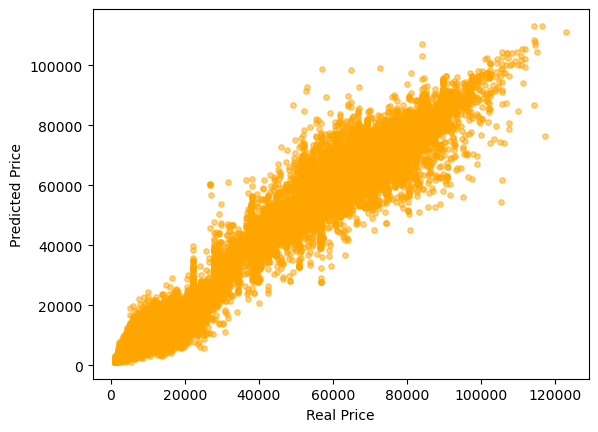

In [50]:
# 가격예측
predY = rf.predict(X)

# 실제 Y vs 예측 Y 출력
plt.scatter(Y,predY, c='orange', s=15, alpha=0.5)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.show()

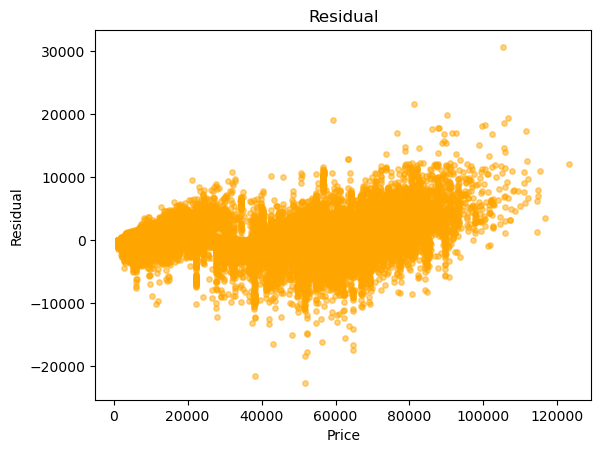

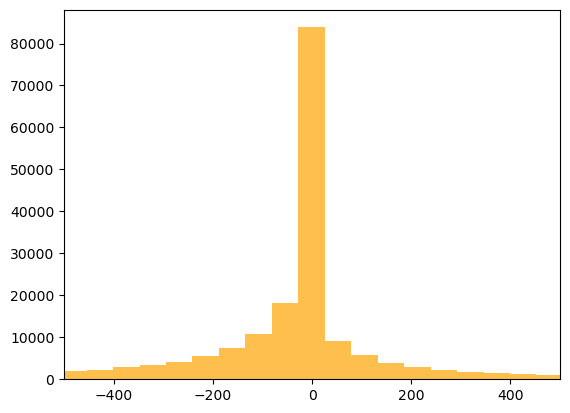

In [51]:
# 잔차분석
residual = Y_train - predY_in

# 시각화
plt.scatter(Y_train,residual,c = 'orange', s=15, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

# 잔차를 시각화로 표현
plt.hist(residual, bins=1000, color='orange', alpha=0.7)
plt.xlim([-500,500])
plt.show()

**결론: 가격예측과 잔차분석을 통해 예측된 값은 크게 변동이 없다.**